In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import scipy as sp
from scipy.optimize import curve_fit

# Tarea 03 Física Experimental 4

#### - David García Gómez
#### -Juan Montoya Sánchez

## Resumen:

Se tomaron los datos de intensidad relativa de varias fuentes de luz con un espectrómetro digital Thorlabs CCS100, y analizando el espectro de cada fuente, se estudiaron y caracterizaron las  temperaturas y  materiales de cada lámpara.

Se tomaron datos de las siguientes fuentes de luz:

-Lámpara incandescente

-Lámpara de Mercurio

-CFL (Compact fluorescent lamp)

-Pantalla del celular

-Flash del celular

## Introducción:

Desde el inicio de la humanidad, el hombre se ha caracterizado en su curiosidad e interés por los fenómenos naturales, haciendo ritos, creencias, arte y ciencia para domarlos o predecirlos. Sin duda, el cielo, (el sol, las estrellas, los planetas), fueron una gran inspiración para los artistas y filósofos, sin embargo, no fue hasta el desarrollo de la espectroscopía que el hombre pudo desentrañar la luz y sus mecanismos. 

La espectroscopía nos permite entender la interacción de la materia con la luz. La luz, como onda electromagnética, está asociada a una o múltiples longitudes de onda que la caracterizan dependiendo del material que las emite, o que la absorbe. La radiación electromagnética que generan los átomos están relacionados a las transiciones de electrones entre sus niveles de energía, (cuando se le entrega energía a un átomo, sus electrones saltan dentro de sus niveles de energía y emiten fotones en este proceso), la luz producida, se emite con picos en ciertas longitudes de onda que están asociadas al átomo. Sin embargo, existen fenómenos como la incandescencia, que hacen que los materiales emitan en todo el espectro de longitudes de onda, (desde el infrarojo hasta el ultravioleta).

En 1672 con los experimentos de Newton en los que utilizó un prisma para descomponer la luz blanca en todo su espectro, la espectroscopía empezó su camino, desarrollándose de tal forma que para 1815 se descubrió que el espectro de luz que el sol emitía tenía discontinuidades. Estas son las llamadas líneas de Fraunhofer, que son consecuencia de la absorción de la luz de los elementos que se encuentran en la atmósfera solar. Permitiendo después, caracterizar estas discontinuidades para la emisión y absorción de diferentes materiales y así conocer, tan solo con la luz, los materiales de los que las estrellas están compuestas.



Este informe consta de dos partes. En la primera parte, se realizará un análisis de la temperatura de una lámpara incandescente con la ley de Wein, y se ajustará la curva de emisión con los métodos aprendidos en el curso.

La segunda parte, consiste en la consulta de los espectros de emisión de la lámpara de mercurio, de la CFL, de la luz de la pantalla del celular y de su flash, para así caracterizar los materiales que usa y sus mecanismos de funcionamiento.

## Desarrollo 

Se dispone de una esfera integradora, con una fuente de luz halógena y un espectrómetro digital Thorlabs CCS100. 


<img src="esfera_integradora.jpeg" width="300">

<img src="Espectómetro.jpeg" width="300">


Se conecta la esfera integradora al espectrómetro digital y el espectrómetro al computador. Se enciende la esfera integradora y se ubica el estandar difuso en el puerto de medida para que quede como referencia en el programa Throlabs OSA. Esta referencia sirve para calibrar los datos de la luminosidad en el programa.

<img src="referencia.jpeg" width="300">


Luego de realizar este proceso, ubicamos la luz a estudiar en la esfera integradora y guardamos los datos en el programa.

<img src="data.jpeg" width="300">

(En la imagen anterior vemos los datos tomados de la lámpara incandescente)



Luego guardamos los datos en el programa para posteriormente analizarlos con python. Se repitió este proceso para la lámpara incandescente, la lámpara de Mercurio-Argón, la CFL, la luz de la pantalla del celular y la luz del flash del celular.




## Datos recolectados:

In [2]:
#Ubicamos los archivos de los datos necesarios

dir_HG = 'Montoya_García/Hg_Ar.Master.sample'
dir_CFL = 'Montoya_García/CFL.Master.sample'
dir_Flash = 'Montoya_García/Flash_cel.Master.sample'
dir_Pant = 'Montoya_García/Pantalla_cel.Master.sample'
dir_Lamp = 'Montoya_García/Lampara_incandecente.Master.irradiance'

# Sabemos que en los archivos de texto, los valores empiezan en la fila 15 y terminan en la fila 2062
ini = 14
fin = 2062-14
# Leemos con pandas los archivos
columns = ['X', 'Y'] #Columnas de los archivos de texto

df_HG = pd.read_csv(dir_HG, skiprows = ini, nrows = fin, sep = '\t', names = columns) #Lampara de mercurio
df_CFL = pd.read_csv(dir_CFL, skiprows = ini, nrows = fin, sep = '\t', names = columns) # compact fluorescent lamp ó esfera integradora
df_Flash = pd.read_csv(dir_Flash, skiprows = ini, nrows = fin, sep = '\t', names = columns)#Flash de celular
df_Pant = pd.read_csv(dir_Pant, skiprows = ini, nrows = fin, sep = '\t', names = columns) #Pantalla de celular
df_Lamp = pd.read_csv(dir_Lamp, skiprows = ini,nrows = fin,  sep = '\t', names = columns) #Lampara incandecente



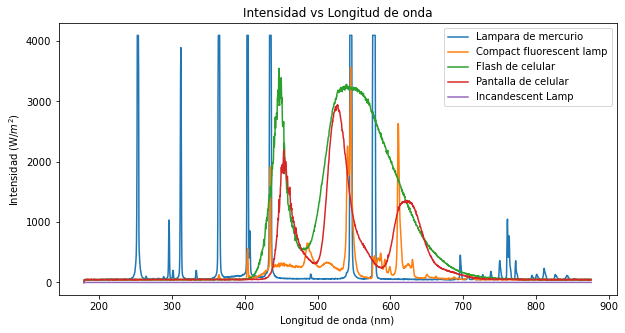

In [3]:
# Graficamos los datos de intensidad vs longitud de onda
plt.figure(figsize=(10,5))
plt.plot(df_HG['X'], df_HG['Y'], label = 'Lampara de mercurio')
plt.plot(df_CFL['X'], df_CFL['Y'], label = 'Compact fluorescent lamp')
plt.plot(df_Flash['X'], df_Flash['Y'], label = 'Flash de celular')
plt.plot(df_Pant['X'], df_Pant['Y'], label = 'Pantalla de celular')
plt.plot(df_Lamp['X'], df_Lamp['Y'], label = 'Incandescent Lamp')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (W/$m^2$)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()


(En la figura anterior se hizo una gráfica con los datos obtenidos con el programa Thorlabs OBS en el laboratorio)

## Primera parte:

Las lámparas incandescentes consisten en un circuito al vacío, generalmente encerrado un una pequeña cápsula de vidrio, en el que se pasa una corriente eléctrica a través de un material. Las lámparas incandescentes más comunes, utilizan filamentos de carbono o tungsteno, que al aplicarles la corriente eléctrica, se calientan y emiten luz. En la cápsula de vidrio hay gases inertes, generalmente Argón, que permite que el filamento no se oxide, y aumente su duración [1].

Las lámparas incandescentes, son muy ineficientes, por lo que su producción fue escalonadamente deteriorándose, hasta que lámparas como la CFL y otras lámparas con tegnología led, fueron acaparando el mercado.

Este tipo de lámparas, tienen la propiedad de emitir continuamente en todos los espectros de luz debido a su fenómeno de incandescencia, que hace que el material emita como un cuerpo negro. Sin embargo, gran parte de la energía que consume se transforma en luz no visible, (infrarojo o ultravioleta) lo que hace su funcionamiento bastante ineficiente. 

Si asumimos que la lámpara incandescente emite como cuerpo negro, podemos usar la ley de planck para ajustar los datos obtenidos en el programa y posterior a eso, usar la ley de Wein para aproximar la temperatura de la lámpara hallando el pico de emisión de la reconstrucción de los datos.

 

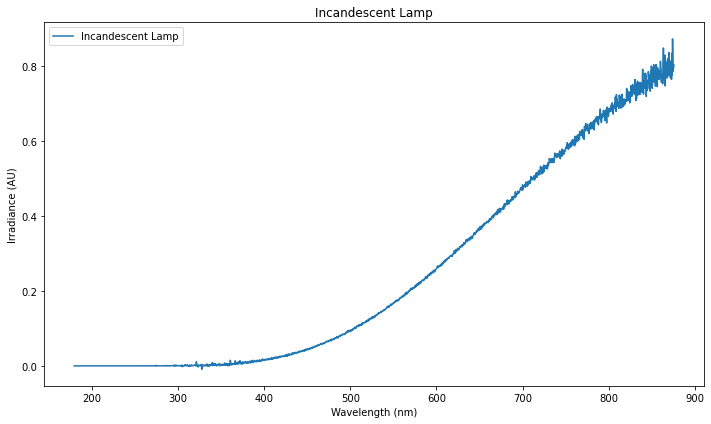

In [4]:
# Gaficar los datos de la lampara incandecente 

plt.figure(figsize=(10,6))

plt.plot(df_Lamp['X'], df_Lamp['Y'], label = 'Incandescent Lamp')
plt.title('Incandescent Lamp')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Irradiance (AU)')
plt.legend()  

plt.tight_layout()
plt.show()



(La gráfica anterior nos muestra los datos tomados de la lámpara incandescente, en el eje x están las longitudes de onda y en el eje y se muestra la irradiancia correspondiente a cada longitud de onda, las unidades de el longitud de onda se da en nanómetros, y las del eje y son unidades arbitrarias (AU) dado que el espectrómetro da una irradiancia relativa y no absoluta).

#### Ajuste:

Para ajustar, creamos una función de la siguiente forma:
$$I_{A,B}(\lambda)=\frac{A}{\lambda^5}\frac{1}{e^{B/\lambda}-1}$$


Donde los parámetros A, B absorben las constantes que escalan y llevan las unidades ya que, como explicamos, los datos que tenemos, no tienen unidades específicas. Así podemos hallar con scipy.optimize.curve_fit los parámetros A,B que caracterizan la curva obtenida con los datos experimentales.

In [5]:
#Definimos la función:
def planck(wavelength,A,B):
    return (A / (wavelength)**5)*(1/ (np.exp(B/ (wavelength)) - 1))

# Constants
h = 6.62607015e-34  # Planck constant (m^2 kg / s)
c = 299792458       # Speed of light (m/s)
k = 1.380649e-23    # Boltzmann constant (m^2 kg / s^2 K)
T = 2970        # Temperature (K)


Ahora usamos la función curve_fit para hallar los parámetros A,B

No handles with labels found to put in legend.


Los valores de A y B son: 2.986508222914494e+17 y 5760.658141191688 respectivamente


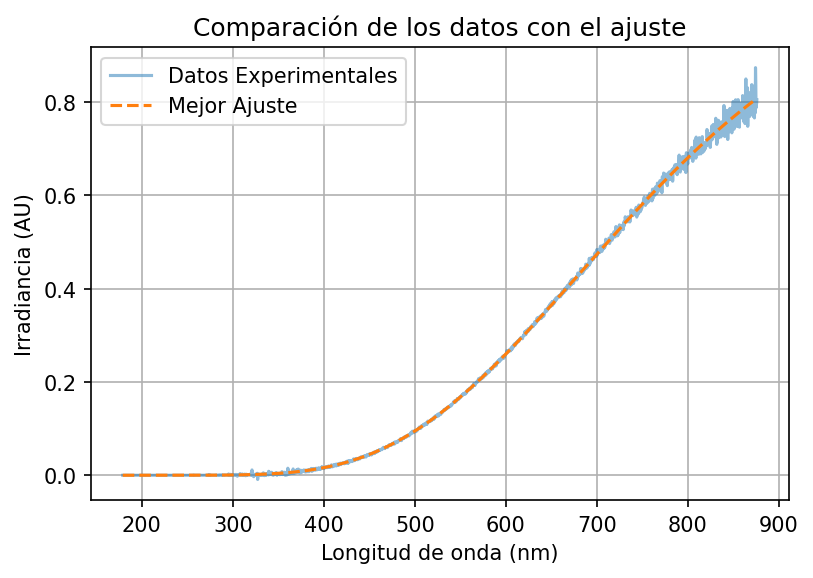

In [6]:
#m=np.mean(df_Lamp["Y"])
#A=2*h*c**2*1e-12*(1e9)**5
#B=h*c/(k*T)*1e9
val_ini = [0,1]
mej_val, cov = curve_fit(planck,df_Lamp['X'],df_Lamp['Y'],val_ini)
#print('mej_val: {}'.format(mej_val))
#]print(cov)
perr = np.sqrt(np.diag(cov))
#print(perr)
yaj = planck(df_Lamp['X'],mej_val[0], mej_val[1],)

plt.figure(dpi=150)
#plt.plot(np.arange(200,900,0.1),planck(A,B,np.arange(200,900,0.1)))
plt.legend()
#plt.figure(dpi=150)
plt.plot(df_Lamp['X'], df_Lamp['Y'],label='Datos Experimentales', alpha=0.5)
plt.plot(df_Lamp['X'], yaj, '--', label='Mejor Ajuste',alpha=1)
#plt.xlabel('df_Lamp_X')
#plt.ylabel('Y')
plt.title('Comparación de los datos con el ajuste')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Irradiancia (AU)')
plt.legend(loc='best')
plt.grid(True)
print("Los valores de A y B son:",mej_val[0],"y",mej_val[1],"respectivamente")
plt.show()

(En la gráfica podemos ver como los parámetros A,B encontrados, ajustan bastante bien la curva de los datos experimentales)


Ahora vamos a utilizar estos parámetros para hallar el pico de la función:

C:\Users\Arturo\AppData\Local\Temp/ipykernel_18100/4184676273.py:3: RuntimeWarning: overflow encountered in exp
  return (A / (wavelength)**5)*(1/ (np.exp(B/ (wavelength)) - 1))
C:\Users\Arturo\AppData\Local\Temp/ipykernel_18100/4184676273.py:3: RuntimeWarning: overflow encountered in exp
  return (A / (wavelength)**5)*(1/ (np.exp(B/ (wavelength)) - 1))


El pico de emisión de la función ajustada se encuentra en: 1160.200000000001 nm


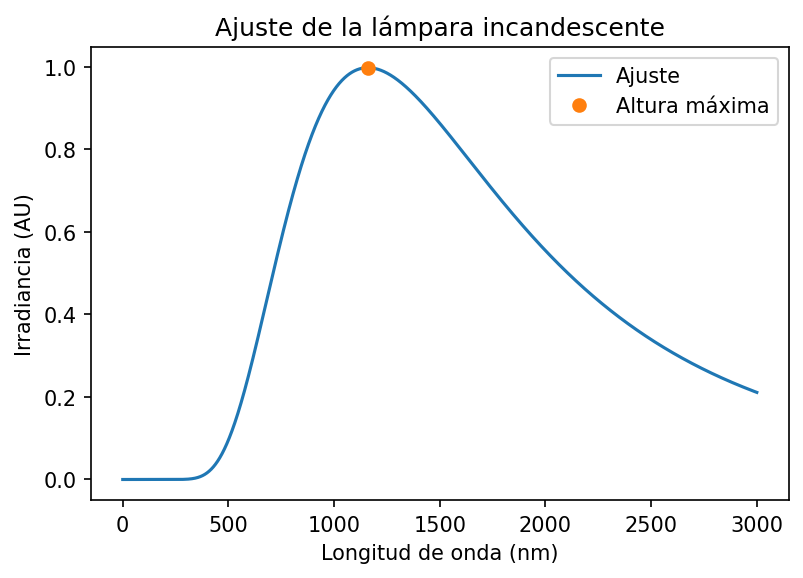

In [7]:
##
x=np.arange(1,3000,0.1)
plt.figure(dpi=150)
plt.plot(x,planck(x,mej_val[0],mej_val[1]),label="Ajuste")
MX=np.argmax(planck(x,mej_val[0],mej_val[1]))
plt.plot(x[MX],planck(x[MX],mej_val[0],mej_val[1]),"o",label="Altura máxima")
print("El pico de emisión de la función ajustada se encuentra en:",x[MX],"nm")
plt.title('Ajuste de la lámpara incandescente')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Irradiancia (AU)')
plt.legend()
plt.show()

(En la gráfica se muestra el pico máximo de la función)

Teniendo la longitud de onda en la que la función tiene el pico, podemos usar la ley de Wein que estipula lo siguiente:

$$T=\frac{b}{\lambda_{max}}$$

donde $b$ es la constante de Wien y $\lambda_{max}$ es la longitud de onda donde se encuentra el pico de emisión del cuerpo negro [1]

Así, podemos calcular la temperatura de la lámpara.

In [8]:
b = 2.897e-3 # Constante de Wien
def Wein_L(lam):
    """
    Función que calcula la temperatura de un objeto a partir de la longitud de onda máxima
    lam: longitud de onda máxima
    """
    return b / lam


Ahora, usando la ley de Wein, podemos hallar la temperatura:

In [9]:
print("Usando la ley the Wein para aproximar la temperatura de la lámpara tenemos que es de:",Wein_L(x[MX])*1e9,"°K")

Usando la ley the Wein para aproximar la temperatura de la lámpara tenemos que es de: 2496.983278745042 °K


El rango de temperatura de una lámpara incandescente está entre los 2100 °K y los 3200°K, por lo que la aproximación que tenemos es coherente. Tengamos en cuenta que  estamos asumiendo que la lámpara incandescente emite como un cuerpo negro, lo cual no es cierto, pero que como aproximación en el fenómeno de incandescencia, nos puede dar una idea "cercana" de la temperatura.


#### Prueba Chi cuadrado:

Realizaremos una prueba de ajuste chi cuadrado para medir la bondad del ajuste en comparación a los datos experimentales obtenidos.

7
-0.0091 0.8734
Chi cuadrado = 0.4698013463799299


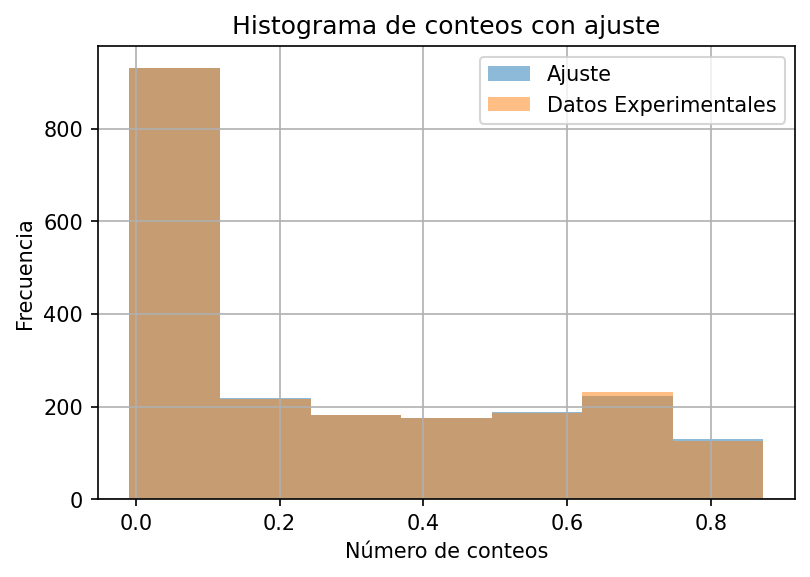

In [10]:
from numpy import exp, linspace, random, std, mean, log10, ceil, diag, sqrt, e, power,array, log
def chi_sqr(dathistexp, dathistaj):
    mask = dathistaj != 0
    dathistexp = dathistexp[mask]
    dathistaj = dathistaj[mask]
    return sum(((dathistexp - dathistaj)**2) / dathistaj)

plt.figure(dpi=150)
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbinm = int(1 + 3.322 * log10(101)) 
print(nbinm)

#Definimos un rango minimo ln_y maximo comun para los datos obtenidos experimentamente ln_y por medio del ajuste
yminm, ymaxm = min(min(df_Lamp["Y"]), min(yaj)), max(max(df_Lamp["Y"]), max(yaj))
print(yminm, ymaxm)

#Se hace el histograma dividiendo el rango definido arriba entre el numero de intervalos calculado previamente. Esto lo hace la funcion plt.hist automaticamente.
[naj, baj, paj] = plt.hist(yaj, nbinm, range=(yminm, ymaxm), alpha=0.5, label='Ajuste')
[n, b, p] = plt.hist(df_Lamp["Y"], nbinm, range=(yminm, ymaxm), alpha=0.5, label='Datos Experimentales')
plt.xlabel('Número de conteos')
plt.ylabel('Frecuencia')
plt.title('Histograma de conteos con ajuste')
plt.legend(loc='best')
plt.grid(True)
#print(b)
#print(baj)
#print(n)
#print(naj)
print('Chi cuadrado =', chi_sqr(n, naj))

plt.show()

(La gráfica anterior muestra la frecuencia en intervalos de los datos obtenidos y los datos experimentales)


Podemos notar que el histograma de ajuste y el histograma de los datos se solapan casi perfectamente, y además chi cuadrado tiene un valor muy cercano a cero lo que significa que las diferencias entre los datos experimentales y los datos ajustados corresponden a variaciones aleatorias más que a errores sistemáticos en la forma de medición de los datos.

Esto nos da una confidencia en que el modelo de curva que usamos para ajustar es bueno para representar los datos experimentales.

## Parte 2:



### Lámpara de Mercurio-Argón:

Primero veamos la gráfica completa de los gráficos obtenidos para la lámpara de mercurio argón:

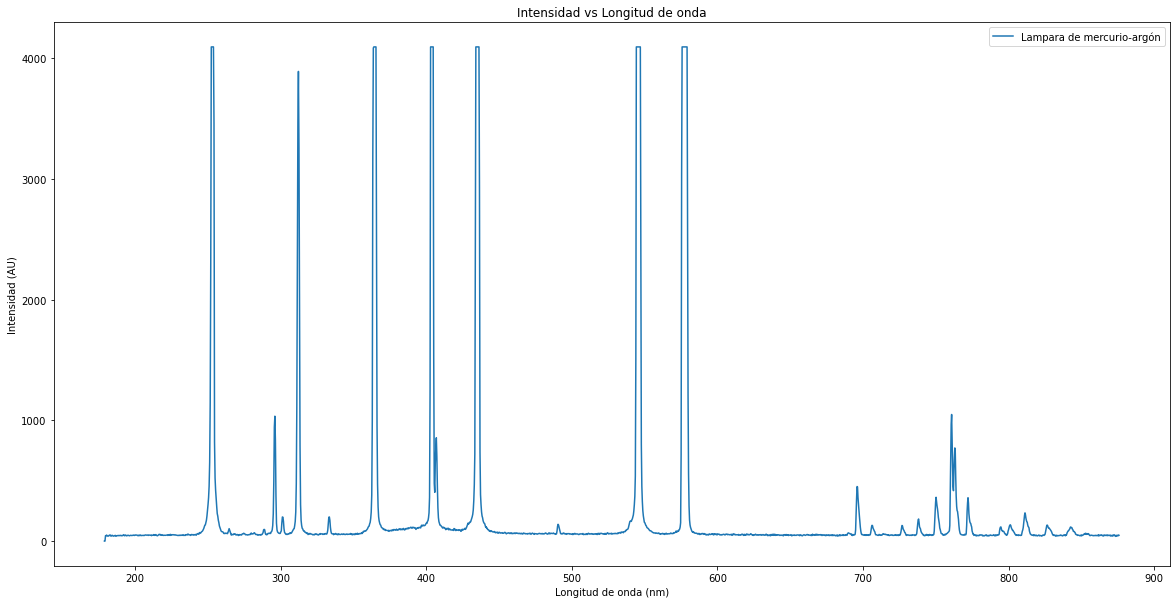

In [11]:


plt.figure(figsize=(20,10))
plt.plot(df_HG['X'], df_HG['Y'], label = 'Lampara de mercurio-argón')

plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (AU)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()

El objetivo de esta parte, es encontrar a qué elemento corresponden los picos de emisión que vemos en la gráfica anterior, por lo que nos remitiremos a las bases de datos científicas donde se encuentra la información de los espectros de emisión de ambos elementos [2]. 

En este caso, solo tomamos los datos de los picos más relevantes del mercurio y del argón, ya que pueden existir más picos de emisión de ambos elementos, pero no son tan pronunciados como los que tomamos:

In [12]:
# Picos de emisión del mercurio en nm
picos_mercurio = np.array([ 253.7, 365.0, 404.7, 435.8, 546.1, 576.9, 579.1, 580.4])

# Picos de emisión del argón en nm
picos_argon = np.array([488, 514, 693,748,760,773, 803, 826.5, 852.1])

print("Los picos de emisión del mercurio en nm son:",picos_mercurio)

print("Los picos de emisión del argón en nm son:",picos_argon)

Los picos de emisión del mercurio en nm son: [253.7 365.  404.7 435.8 546.1 576.9 579.1 580.4]
Los picos de emisión del argón en nm son: [488.  514.  693.  748.  760.  773.  803.  826.5 852.1]


Ahora creemos una gráfica que nos permita diferenciar los picos de ambos elementos comparado con los datos obtenidos en el laboratorio:

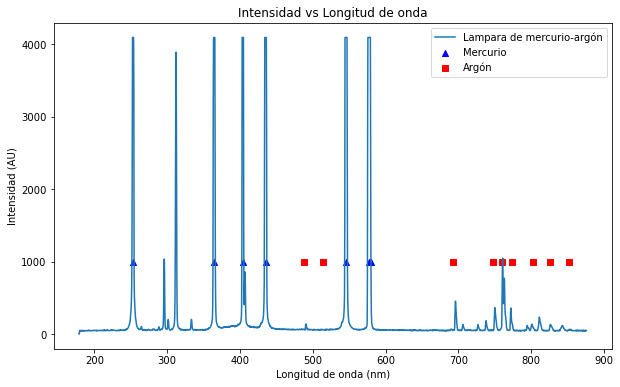

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df_HG['X'], df_HG['Y'], label = 'Lampara de mercurio-argón')
plt.scatter(picos_mercurio, [1000]*len(picos_mercurio), label='Mercurio', color='blue', marker='^')
plt.scatter(picos_argon, [1000]*len(picos_argon), label='Argón', color='red', marker='s')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (AU)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()

Podemos ver claramente que los pequeños triángulos azules, corresponden a los picos de emisión del mercurio, y los pequeños cuadrados rojos, corresponden a los picos de emisión del argón, lo que nos dice que en su mayoría, los picos de emisión de la lámpara entre los 0 nm y los 600 nm corresponden al mercurio, y los picos menos pronunciados que se ven después de los 650 nm corresponden al argón.

In [14]:
# Spectrum of Mercury (Hg)
spectrum_mercury = [
    405.4, 436.6, 546.5, 577.7, 580.2
]

# Spectrum of Europium (Eu)
spectrum_europium = [
    584.0, 587.6, 593.4, 599.7, 611.6,
    631.1, 650.8, 662.6, 687.7, 693.7,
    707, 709, 712.3
]

# Spectrum of Terbium (Tb)
spectrum_terbium = [
    487.7, 542.4, 577.7, 625.7
]

### Compact Fluorescent lamp:




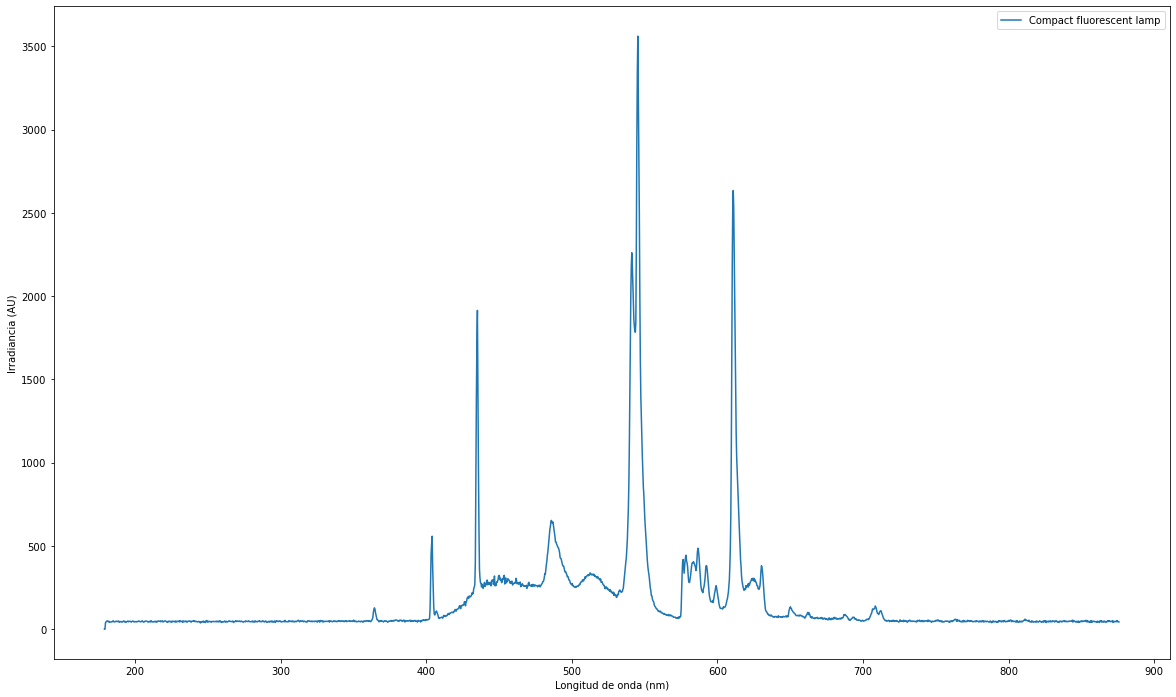

In [15]:
plt.figure(figsize=(20,12))
phosphor_peaks = [
    (365, 0.6),   # Longitud de onda (nm), Intensidad
    (450, 0.8),
    (550, 1.0),
    # Puedes agregar más picos según sea necesario

]
plt.plot()
plt.plot(df_CFL['X'], df_CFL['Y'], label = 'Compact fluorescent lamp')
plt.legend()
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Irradiancia (AU)")
plt.show()

(Se muestra el espectro de emisión de una Lámpara fluorescente compacta).


Cuando la se enciende una lámpara de este tipo, el mercurio dentro de la lámpara se ioniza y empieza a emitir en ultra violeta, que es luz invisible para nosotros. Por esto, se recubre internamente de fósforos con algunas impuresas que absorben esta luz y emiten en luz visible para nosotros. Existen varios tipos de materiales utilizados para este tipo de lámpara, sin embargo, el espectro de emisión de esta lámpara en específico, corresponde al Terbio y al Europio [3].

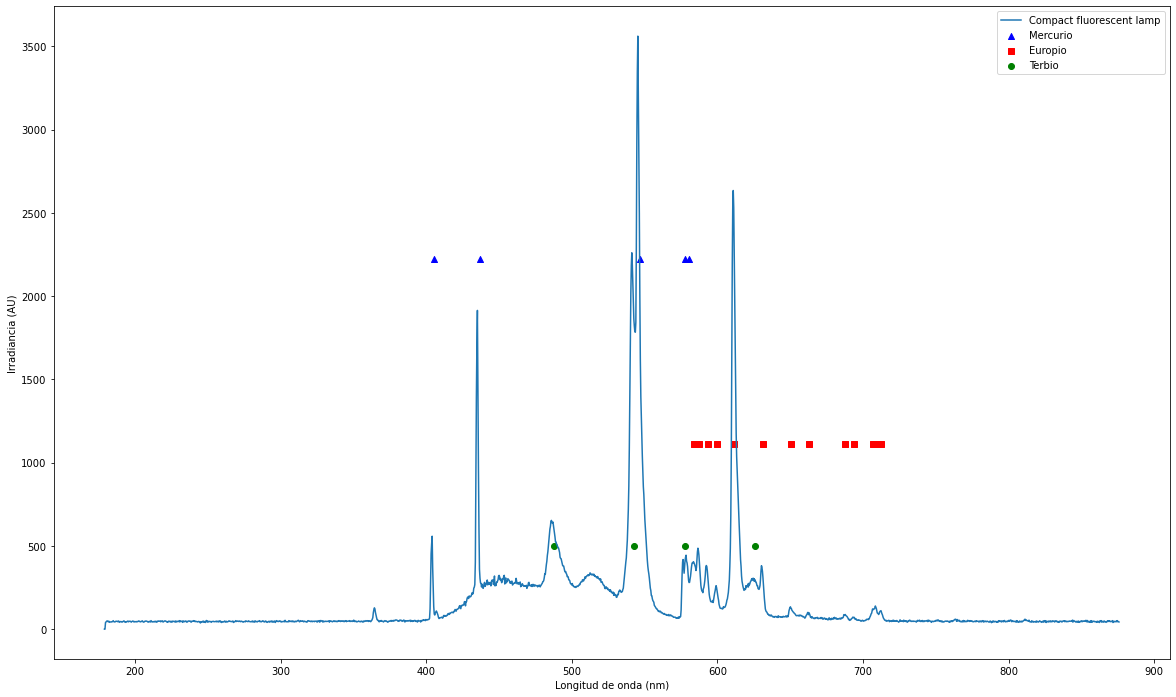

In [16]:
plt.figure(figsize=(20,12))
phosphor_peaks = [
    (365, 0.6),   # Longitud de onda (nm), Intensidad
    (450, 0.8),
    (550, 1.0),
    # Puedes agregar más picos según sea necesario

]
plt.scatter(spectrum_mercury, [2222]*len(spectrum_mercury), label='Mercurio', color='blue', marker='^')
plt.scatter(spectrum_europium, [1111]*len(spectrum_europium), label='Europio', color='red', marker='s')
plt.scatter(spectrum_terbium, [500]*len(spectrum_terbium), label='Terbio', color='Green', marker='o')
plt.plot()
plt.plot(df_CFL['X'], df_CFL['Y'], label = 'Compact fluorescent lamp')
plt.legend()
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Irradiancia (AU)")
plt.show()

### Pantalla de celular (RedmiNote 11):

Primero veamos la gráfica completa de los gráficos obtenidos para la pantalla del celular:

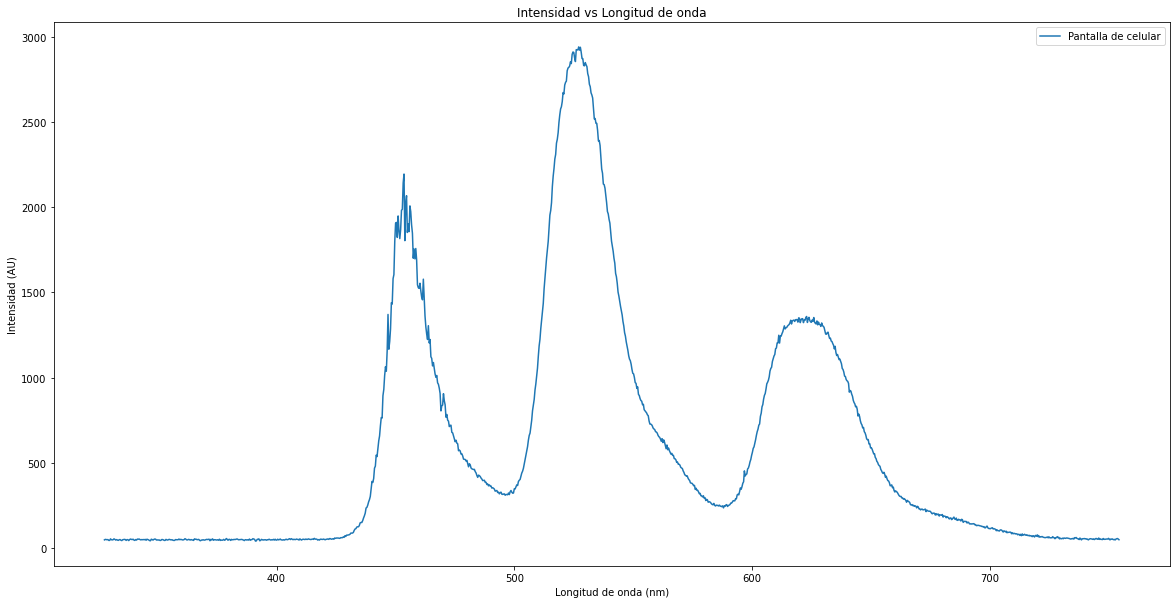

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df_Pant['X'][400:-400], df_Pant['Y'][400:-400], label = 'Pantalla de celular')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (AU)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()

A priori sabemos que las pantallas de los celulares son contruidas en torno al RGB, lo cual explicaría los picos de emisión que vemos en la gráfica, ya que el rojo, el verde y el azul, son los colores primarios de la luz. Sin embargo, debemos considerar el tipo de pantalla, que en este caso es AMOLED, lo cual es una tecnología que permite que los pixeles emitan luz de forma independiente, lo que nos da una gama de colores más amplia y una mejor calidad de imagen.[4]

In [18]:
# blue (peaking around 445 nm), green (peaking around 535 nm), and red (peaking around 575 nm).
rgb = [445, 535, 575]

In [19]:
# encontramos en que indice de df_Pant['X'] se encuentran los valores de rgb
indices = [np.argmin(np.abs(df_Pant['X'] - i)) for i in rgb]

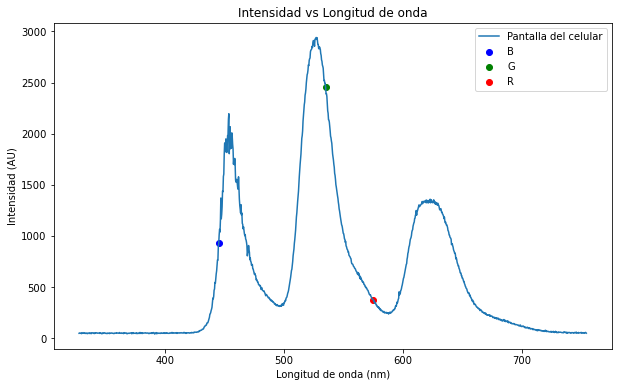

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df_Pant['X'][400:-400], df_Pant['Y'][400:-400], label = 'Pantalla del celular')
plt.scatter(rgb[0], df_Pant['Y'][indices[0]], label='B', color='blue')
plt.scatter(rgb[1], df_Pant['Y'][indices[1]], label='G', color='green')
plt.scatter(rgb[2], df_Pant['Y'][indices[2]], label='R', color='red')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (AU)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()

### Flash de celular (RedmiNote 11):

Primero veamos la gráfica completa de los gráficos obtenidos para la pantalla del celular:

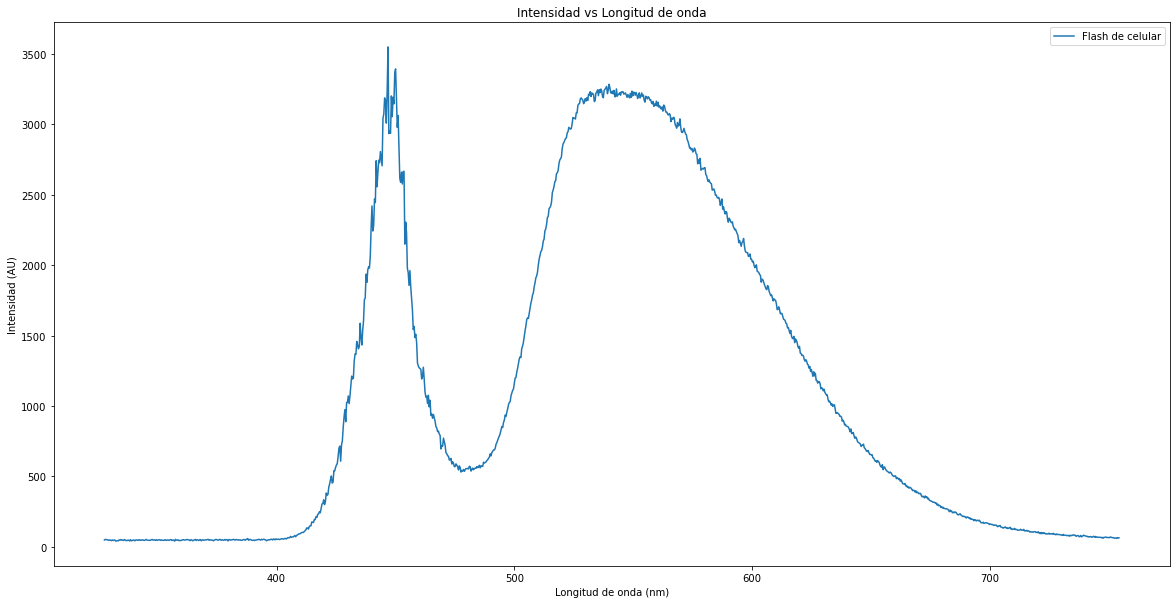

In [21]:
plt.figure(figsize=(20,10))
plt.plot(df_Flash['X'][400:-400], df_Flash['Y'][400:-400], label = 'Flash de celular')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (AU)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()

A priori creemos que el flash de los celulares son contruidos en torno al RGB, lo cual no seria muy facil de ver con los picos de emisión que vemos en la gráfica, ya que el rojo y el verde estan compartiendo un mismo pico, en este caso la tecnologia es LED, cual para nuestra sorpresa la luz blanca LED no es RGB, si no que esta regida por principalemente la combinacion de azul y amarillo. Esto se da debido a que el diodo LED funciona emitiendo fotones de una longitud de onda proporcional al ancho de la banda prohibida del material con el que este hecho.[5]

In [22]:
# blue (peaking around 445 nm), yellow (570nm).
yb = [445,570]

In [23]:
# encontramos en que indice de df_Pant['X'] se encuentran los valores de rgb
indices2 = [np.argmin(np.abs(df_Flash['X'] - i)) for i in yb]

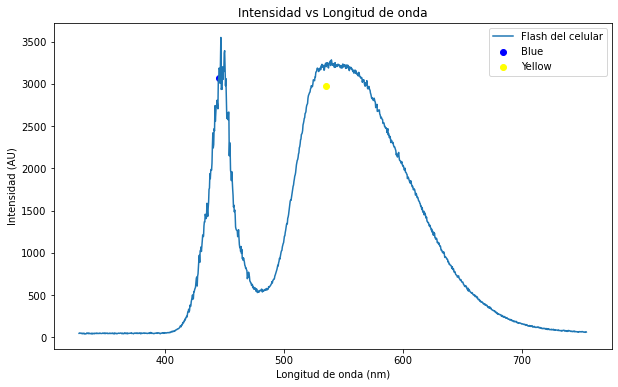

In [24]:
plt.figure(figsize=(10,6))
plt.plot(df_Flash['X'][400:-400], df_Flash['Y'][400:-400], label = 'Flash del celular')
plt.scatter(rgb[0], df_Flash['Y'][indices2[0]], label='Blue', color='blue')
plt.scatter(rgb[1], df_Flash['Y'][indices2[1]], label='Yellow', color='yellow')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad (AU)')
plt.legend()
plt.title('Intensidad vs Longitud de onda')
plt.show()

* [1] M. Born and E. Wolf, Principles of Optics: Electromagnetic Theory of Propagation, Interference and Diffraction of Light, 7th ed. Cambridge University Press, 1999.

* [2] NIST Atomic Spectra Database, "Atomic Spectra Database Lines Form," NIST, Gaithersburg, MD, USA. Recuperado de https://www.nist.gov/pml/atomic-spectra-database

* [3] Wikimedia Commons, "File:Fluorescent lighting spectrum peaks labeled with colored peaks added," Wikimedia Foundation, San Francisco, CA, USA, 2014. Recuperado de https://commons.wikimedia.org/wiki/File:Fluorescent_lighting_spectrum_peaks_labeled_with_colored_peaks_added.png

* [4] Yeo, Hui-Shyong & Lee, Juyoung & Bianchi, Andrea & Harris-Birtill, David & Quigley, Aaron. (2017). SpeCam: sensing surface color and material with the front-facing camera of a mobile device. 1-9. 10.1145/3098279.3098541.

* [5] Solyman OM, Hamdy O, Abdelkawi SA, Hassan AA. Investigating the light emitting diode (LED) flashlight characteristics of a sample of smartphones for its safety in indirect retinal photography. Pan Afr Med J. 2022 Sep 8;43:15. doi: 10.11604/pamj.2022.43.15.32963. PMID: 36451727; PMCID: PMC9674527.